In [4]:
import pandas as pd
import numpy as np
import csv
Jobpostings = pd.read_csv('F:/Zulu/My Btech/Semester 4/Minor/fake_job_postings.csv',encoding='utf8' )
Jobpostings.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
Jobpostings.shape

(17880, 18)

In [6]:
def assess_NA(df):
    """
    Returns a pandas dataframe denoting the total number of NA values and the percentage of NA values in each column.
    The column names are noted on the index.
    
    Parameters
    ----------
    data: dataframe
    """
    # pandas series denoting features and the sum of their null values
    null_sum = df.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(df.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA
print(assess_NA(Jobpostings))
#Jobpostings.shape
#Jobpostings.dropna(how='all',inplace=True)

                     Number of NA  Percent NA
salary_range                15012       83.96
department                  11547       64.58
required_education           8105       45.33
benefits                     7210       40.32
required_experience          7050       39.43
function                     6455       36.10
industry                     4903       27.42
employment_type              3471       19.41
company_profile              3308       18.50
requirements                 2695       15.07
location                      346        1.94
description                     1        0.01


In [7]:
#Removing the data with desc and location null(i.e deletion of 347 entries for better prediction)
Jobpostings = Jobpostings[Jobpostings['location'].notnull()]
Jobpostings = Jobpostings[Jobpostings['description'].notnull()]
Jobpostings.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [8]:
Jobpostings.shape

(17533, 18)

In [9]:
Jobpostings["fraudulent"].value_counts()

0    16687
1      846
Name: fraudulent, dtype: int64

In [10]:
Jobpostings.fillna(0,inplace=True)
Jobpostings.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,0,1,0,Other,Internship,0,0,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,0,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",0,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,0,1,0,0,0,0,0,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",0,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [37]:
Jobpostings["location"].value_counts()
Jobpostings["department"].value_counts()

2       11251
3         547
16        486
0         396
25        270
        ...  
1240        1
1224        1
1208        1
1192        1
1319        1
Name: department, Length: 1327, dtype: int64

In [12]:
grouped1 = Jobpostings.groupby('fraudulent')
print("Number of not fraud and fraud customers with required_education wise: ")
print(grouped1['required_education'].value_counts())
grouped2 = Jobpostings.groupby('fraudulent')
print("Number of not fraud and fraud customers with required_experience wise: ")
print(grouped2['required_experience'].value_counts())
grouped3 = Jobpostings.groupby('fraudulent')
print("Number of not fraud and fraud customers with employment_type wise: ")
print(grouped3['employment_type'].value_counts())

Number of not fraud and fraud customers with required_education wise: 
fraudulent  required_education               
0           0                                    7385
            Bachelor's Degree                    5014
            High School or equivalent            1898
            Unspecified                          1332
            Master's Degree                       379
            Associate Degree                      266
            Certification                         150
            Some College Coursework Completed      98
            Professional                           70
            Vocational                             48
            Doctorate                              25
            Vocational - HS Diploma                 9
            Some High School Coursework             7
            Vocational - Degree                     6
1           0                                     435
            High School or equivalent             169
            Bachelo

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

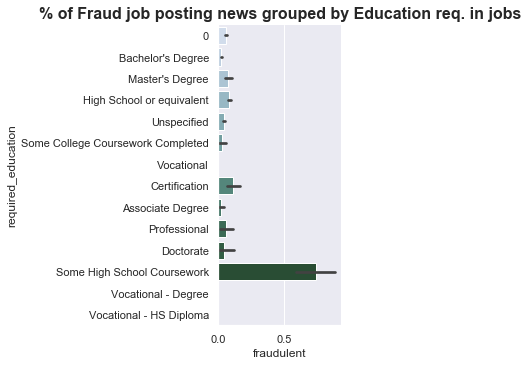

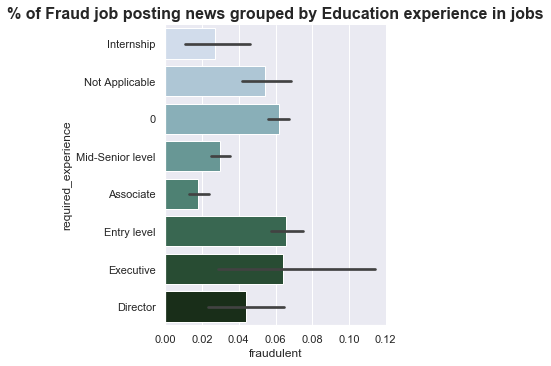

                         Count of fraud and non fraud news for various experience asked in the news


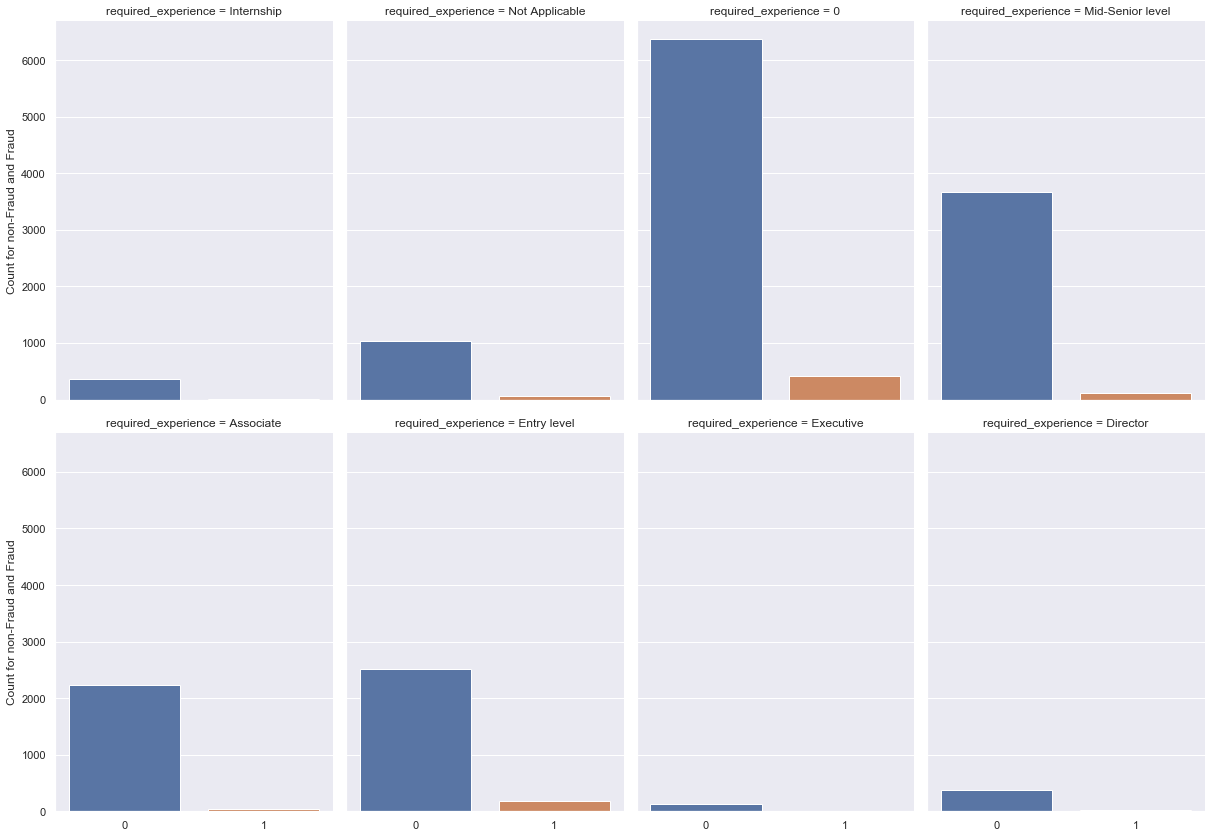

In [14]:
sns.catplot(x='fraudulent',y="required_education", data=Jobpostings, kind='bar', palette="ch:10.75")
plt.title('% of Fraud job posting news grouped by Education req. in jobs', weight='bold', fontsize=16)
plt.show()
sns.catplot(x='fraudulent',y="required_experience", data=Jobpostings, kind='bar', palette="ch:10.75")
plt.title('% of Fraud job posting news grouped by Education experience in jobs', weight='bold', fontsize=16)
plt.show()
print("                         Count of fraud and non fraud news for various experience asked in the news")
g=sns.catplot("fraudulent", col="required_experience", col_wrap=4,data=Jobpostings,kind="count", height=6, aspect=.7)
g.set_axis_labels("", "Count for non-Fraud and Fraud")
plt.show()


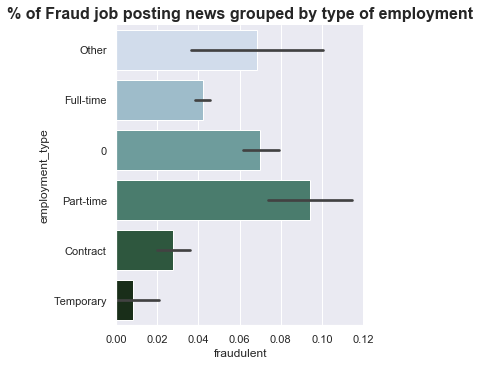

                         Count of fraud and non fraud news for various employment type


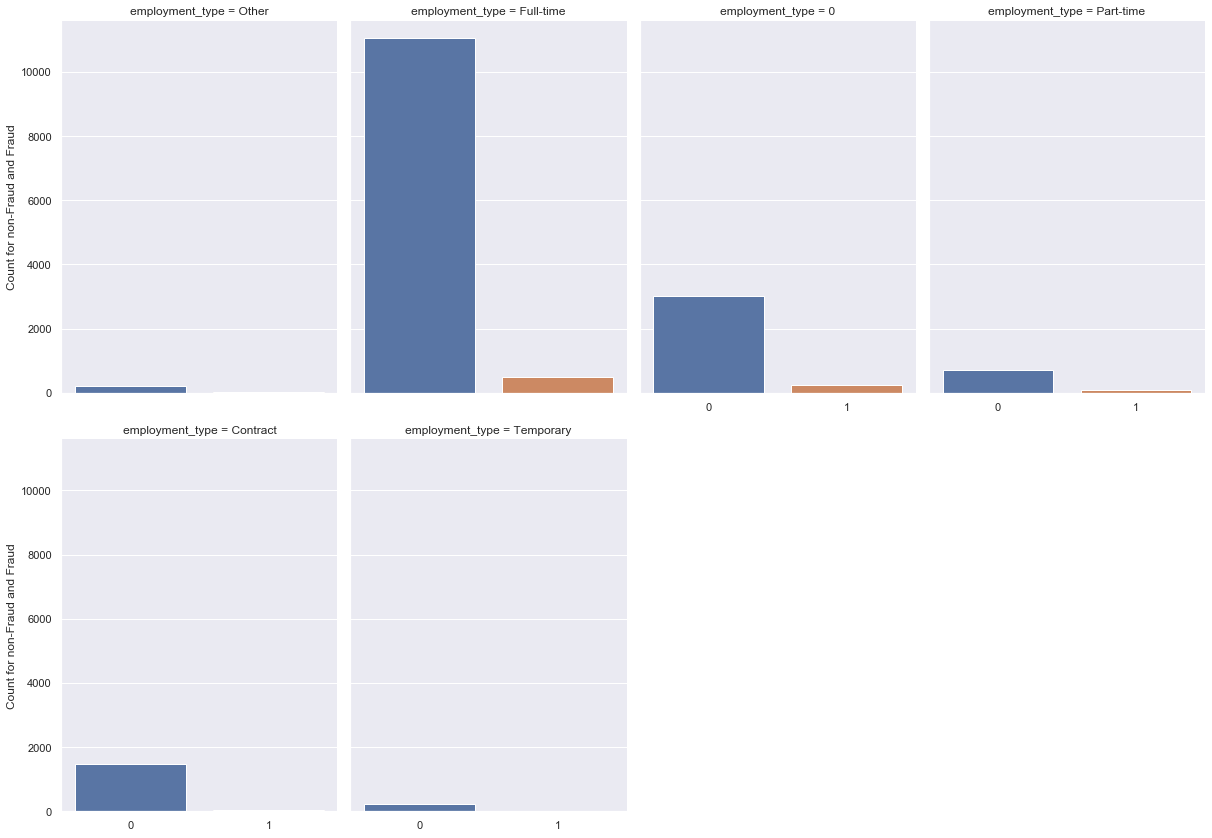

In [15]:
sns.catplot(x='fraudulent',y="employment_type", data=Jobpostings, kind='bar', palette="ch:10.75")
plt.title('% of Fraud job posting news grouped by type of employment', weight='bold', fontsize=16)
plt.show()
print("                         Count of fraud and non fraud news for various employment type")
g=sns.catplot("fraudulent", col="employment_type", col_wrap=4,data=Jobpostings,kind="count", height=6, aspect=.7)
g.set_axis_labels("", "Count for non-Fraud and Fraud")
plt.show()

In [16]:
Jobpostings["location"]=Jobpostings["location"]+","

In [17]:
d=pd.DataFrame(Jobpostings["location"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0))

d=d.sort_values(by=0,axis=0,ascending=False)
print(d.head(16))
print(d.tail(10))
print(d.shape)


                  0
US,         10659.0
,            4134.0
CA,          2525.0
GB,          2384.0
NY,          1282.0
London,      1078.0
LND,          992.0
TX,           975.0
GR,           940.0
San           887.0
New           830.0
I,            688.0
York,         677.0
Athens,       555.0
IL,           496.0
Francisco,    482.0
              0
Barre,      1.0
krakow,     1.0
auckland,   1.0
Pocatello,  1.0
Braselton,  1.0
Egaleo,     1.0
AA,         1.0
Accra,      1.0
GH,         1.0
berlin,     1.0
(2839, 1)


In [18]:
#considered location with 500+data only for analysis(top 16 locations)
l={'US,':10593.0,
'CA,' :     2506.0,
'GB,'  :       2374.0,
'NY,'   :      1259.0,
'London' :     1109.0,
'LND,'    :    992.0,
'TX,'      :    975.0,
'GR,'       :   937.0,
'San'      :    888.0,
'New York'  :       1618.0,
'I,'      :     688.0,
'Athens'   :    568.0,
'Francisco' :   509.0}
print(l)
Tloc={}
Lloc={}
for ind in Jobpostings.index:
    for j in l:
        if j in Jobpostings["location"][ind]:
            if Jobpostings["fraudulent"][ind]==1:
                if j not in Tloc:
                    Tloc[j]=1
                else:
                    Tloc[j]+=1  
            if Jobpostings["fraudulent"][ind]==0:
                if j not in Lloc:
                    Lloc[j]=1
                else:
                    Lloc[j]+=1  

print(Tloc)#total number of fake news location wise for the selected top 16 locations
#print(Lloc)
perloc={}
for i in l:
    for j in Tloc:
        if i==j:
            perloc[i]=(Tloc[i]/l[i])*100
            

{'US,': 10593.0, 'CA,': 2506.0, 'GB,': 2374.0, 'NY,': 1259.0, 'London': 1109.0, 'LND,': 992.0, 'TX,': 975.0, 'GR,': 937.0, 'San': 888.0, 'New York': 1618.0, 'I,': 688.0, 'Athens': 568.0, 'Francisco': 509.0}
{'US,': 730, 'CA,': 157, 'San': 59, 'TX,': 152, 'I,': 23, 'Francisco': 11, 'GB,': 23, 'London': 4, 'NY,': 68, 'New York': 22, 'LND,': 6}


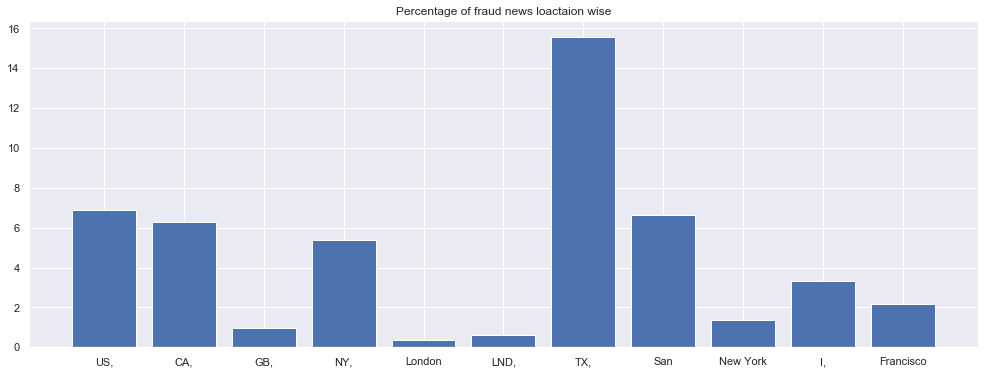

In [19]:
import matplotlib.pyplot as plt


plt.figure(figsize=(17,6))
plt.title("Percentage of fraud news loactaion wise")
plt.bar(range(len(perloc)), perloc.values(), align='center',width=0.8)
plt.xticks(range(len(perloc)), list(perloc.keys()))

plt.show()


In [20]:
Jobpostings.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York,",Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,0,1,0,Other,Internship,0,0,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland,",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,0,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever,",0,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,0,1,0,0,0,0,0,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington,",Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth,",0,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [21]:
#Drop
Jobpostings.drop(['telecommuting'],axis=1,inplace=True)
Jobpostings.drop(['salary_range'],axis=1,inplace=True)
Jobpostings.drop(['has_questions'],axis=1,inplace=True)
Jobpostings.drop(['employment_type'],axis=1,inplace=True)
#
#Jobpostings.drop(['required_experience'],axis=1,inplace=True)
#Jobpostings.drop(['function'],axis=1,inplace=True)
#Jobpostings.drop(['required_education'],axis=1,inplace=True)







In [22]:
#set wd
#set wd
import os
os.getcwd()
os.chdir('F:\Zulu\My Btech\M L\Major Project')
os.getcwd()
#
import subprocess

#read data in-1
df = pd.DataFrame(Jobpostings)
#list(df)
ncol = len(df.axes[1])
nrow=len(df.axes[0])
print("-----------------------All the features of Merged Main Table and their datatypes----------------------- ")
print("%s x %s" % (nrow, ncol)) #check dimension 
print (df.dtypes) #check data types

# count freq
df.groupby('fraudulent').count()

#convert object col to int64 and rename-2
n = ncol
for i in range(0,n):
       if (df.iloc[:,i].dtype==object):
        A= df.iloc[:,i].unique()
        map_to_int = {name: n for n, name in enumerate(A)}
        df.iloc[:,i] = df.iloc[:,i].replace(map_to_int)
print (df.dtypes)


#first n-1 col as features, and the last one as target
df1=df.iloc[:,0:n]
features = list(df1.columns[:(n-1)])
print("* features:", features, sep="\n")
df1.rename(columns={'fraudulent':'Target'}, inplace=True)
list(df1)
df1

y = df1["Target"]
X = df1[features]

-----------------------All the features of Merged Main Table and their datatypes----------------------- 
17533 x 14
job_id                  int64
title                  object
location               object
department             object
company_profile        object
description            object
requirements           object
benefits               object
has_company_logo        int64
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object
job_id                 int64
title                  int64
location               int64
department             int64
company_profile        int64
description            int64
requirements           int64
benefits               int64
has_company_logo       int64
required_experience    int64
required_education     int64
industry               int64
function               int64
fraudulent             int64
dtype: object
* features:
['job_id', 'title'

          ------------------------------------------ Correlation Matrix ------------------------------------------
Co-relation between features
(greenish implies low significance while the reddish implies high significance)
SEE Between target values and others


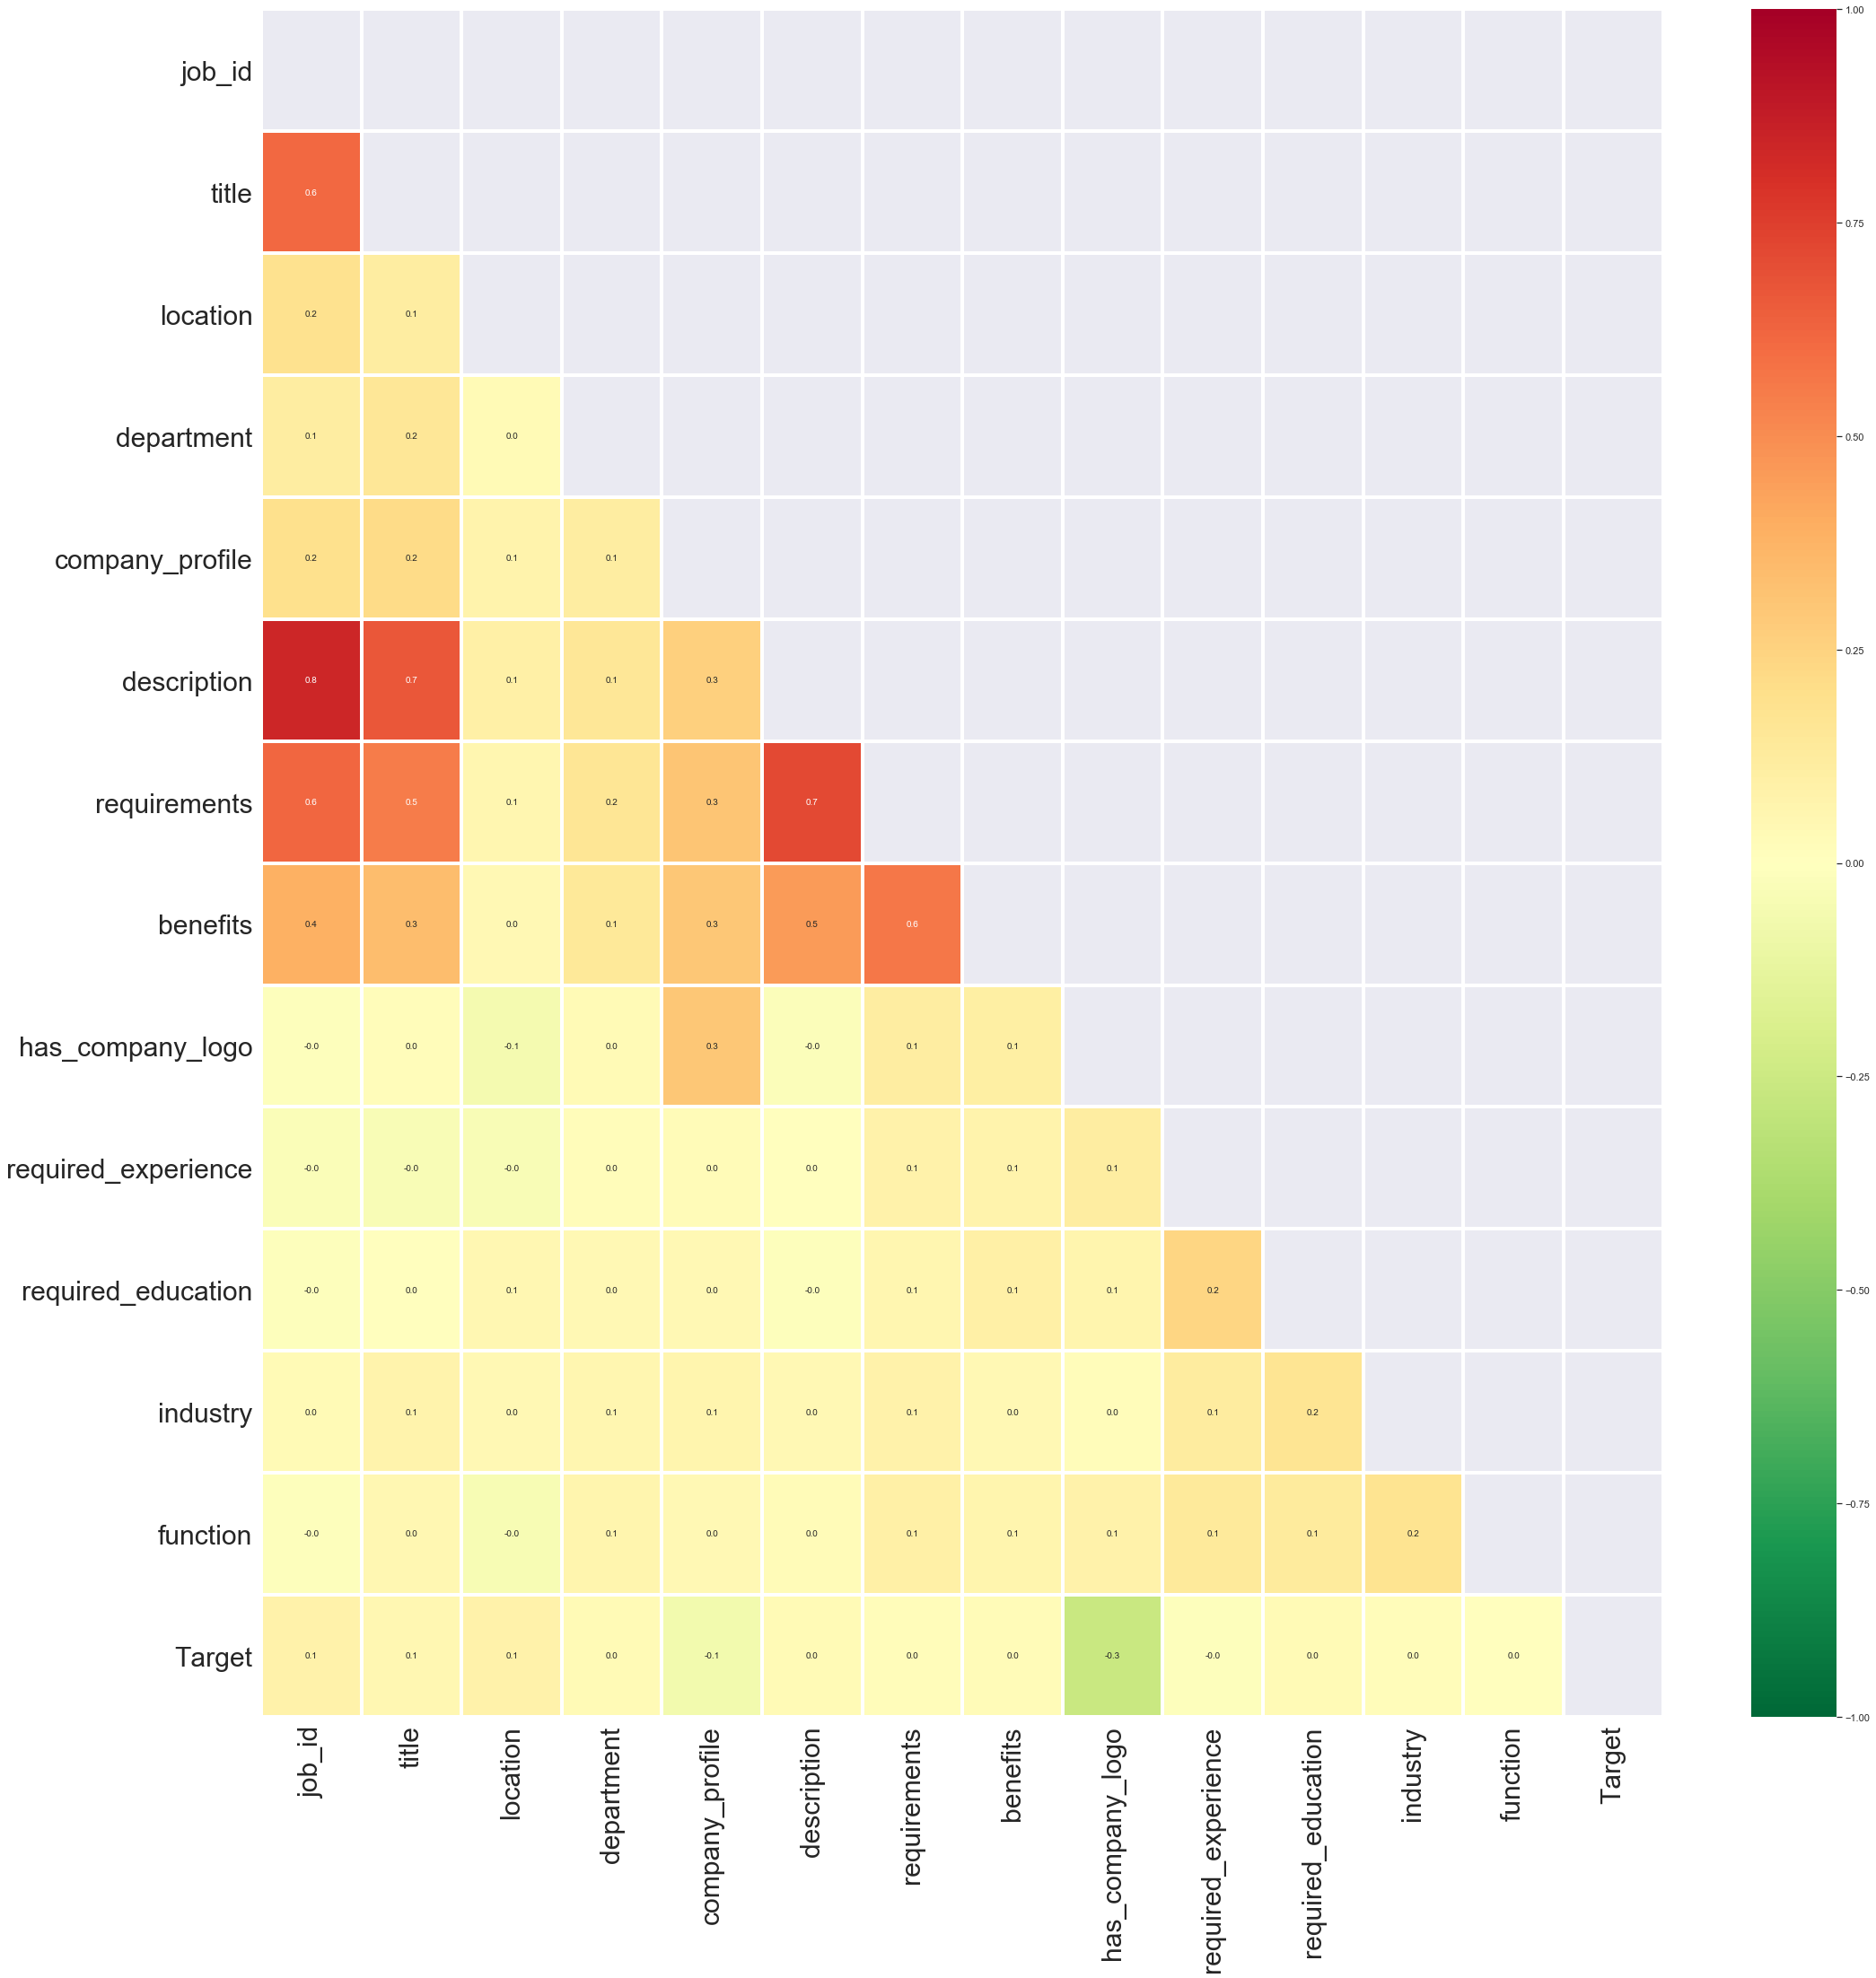

In [23]:
# a quick check the correlation
corr_df = df1.corr()

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
print("          ------------------------------------------ Correlation Matrix ------------------------------------------")
print("Co-relation between features")
print("(greenish implies low significance while the reddish implies high significance)\nSEE Between target values and others")
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
# Create the heatmap using seaborn library. 
plt.figure(figsize=(35,35))
sns.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1 ,mask = mask,  linewidths=3,fmt='.1f',annot=True)
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0,fontsize=30) 
plt.xticks(rotation=90,fontsize=30) 
plt.show()

In [24]:
print(__doc__)

import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
print("-----------------------Best Parameter search using Random and Grid Search----------------------- ")
# get some data
digits = load_digits()
X, y = digits.data, digits.target

# build a classifier
clf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, iid=False)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

Automatically created module for IPython interactive environment
-----------------------Best Parameter search using Random and Grid Search----------------------- 


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


RandomizedSearchCV took 11.19 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.937 (std: 0.028)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_split': 6}

Model with rank: 2
Mean validation score: 0.934 (std: 0.018)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_split': 8}

Model with rank: 3
Mean validation score: 0.929 (std: 0.028)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 2}



C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV took 39.57 seconds for 72 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.937 (std: 0.019)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: 0.935 (std: 0.027)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 10}

Model with rank: 3
Mean validation score: 0.930 (std: 0.025)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_split': 2}



In [25]:
#split data to train and test sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size = 0.3)

y = train["Target"]
X = train[features]

In [26]:
#using default parameters to build random forest model

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X, y)

from sklearn import datasets
from sklearn import metrics   
expected = test["Target"]
X1 = test[features]
predicted1 = clf.predict(X1)

print(metrics.classification_report(expected, predicted1))
print(metrics.confusion_matrix(expected, predicted1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5017
           1       0.94      0.67      0.78       243

    accuracy                           0.98      5260
   macro avg       0.96      0.83      0.88      5260
weighted avg       0.98      0.98      0.98      5260

[[5006   11]
 [  81  162]]


In [27]:
# roc1 for default parameters
probas1_ = clf.fit(X, y).predict_proba(X1)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate1, true_positive_rate1, thresholds = roc_curve(expected, probas1_[:, 1])
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)
roc_auc1

0.979841788946389

In [28]:
#use the best parameters found from RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy', max_features=4, bootstrap= False, min_samples_split=3,
     max_depth=20, min_samples_leaf=3)
clf.fit(X, y)
from sklearn import datasets
from sklearn import metrics   
expected = test["Target"]
X1 = test[features]
predicted2 = clf.predict(X1)

print(metrics.classification_report(expected, predicted2))
print(metrics.confusion_matrix(expected, predicted2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5017
           1       0.94      0.71      0.81       243

    accuracy                           0.98      5260
   macro avg       0.96      0.85      0.90      5260
weighted avg       0.98      0.98      0.98      5260

[[5005   12]
 [  70  173]]


In [29]:
# roc2 for RandomizedSearchCV
probas2_ = clf.fit(X, y).predict_proba(X1)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate2, true_positive_rate2, thresholds = roc_curve(expected,probas2_[:, 1])
roc_auc2 = auc(false_positive_rate2, true_positive_rate2)
roc_auc2

0.9722351412604552

In [30]:
#use the best parameters from GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='gini', max_features=3, bootstrap= False, min_samples_split=4,
                             max_depth=20, min_samples_leaf=3)
clf.fit(X, y)

from sklearn import datasets
from sklearn import metrics   
expected = test["Target"]
print(features)
X1 = test[features]
predicted3 = clf.predict(X1)

print(metrics.classification_report(expected, predicted3))
print(metrics.confusion_matrix(expected, predicted3))
#0 income<=50k
#1 income > 50k

['job_id', 'title', 'location', 'department', 'company_profile', 'description', 'requirements', 'benefits', 'has_company_logo', 'required_experience', 'required_education', 'industry', 'function']
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5017
           1       0.93      0.67      0.78       243

    accuracy                           0.98      5260
   macro avg       0.96      0.83      0.88      5260
weighted avg       0.98      0.98      0.98      5260

[[5005   12]
 [  81  162]]


In [31]:
# roc GridSearchCV
probas3_ = clf.fit(X, y).predict_proba(X1)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate3, true_positive_rate3, thresholds = roc_curve(expected,probas3_[:, 1])
roc_auc3 = auc(false_positive_rate3, true_positive_rate3)
roc_auc3

0.9782627953845813

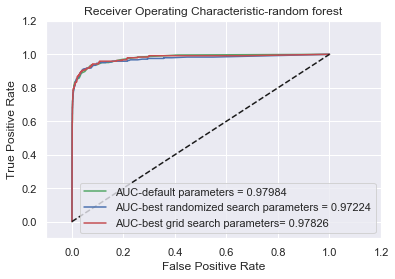

In [32]:
plt.title('Receiver Operating Characteristic-random forest')
plt.plot(false_positive_rate1, true_positive_rate1, 'g',
label='AUC-default parameters = %0.5f'% roc_auc1)


plt.plot(false_positive_rate2, true_positive_rate2, 'b',
label='AUC-best randomized search parameters = %0.5f'% roc_auc2)

plt.plot(false_positive_rate3, true_positive_rate3, 'r',
label='AUC-best grid search parameters= %0.5f'% roc_auc3)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Feature ranking:
1. feature 0 (0.206694)
2. feature 5 (0.139727)
3. feature 4 (0.139154)
4. feature 1 (0.099633)
5. feature 8 (0.074021)
6. feature 2 (0.064228)
7. feature 6 (0.052226)
8. feature 11 (0.051373)
9. feature 7 (0.039422)
10. feature 3 (0.037630)
11. feature 10 (0.035323)
12. feature 12 (0.033800)
13. feature 9 (0.026769)


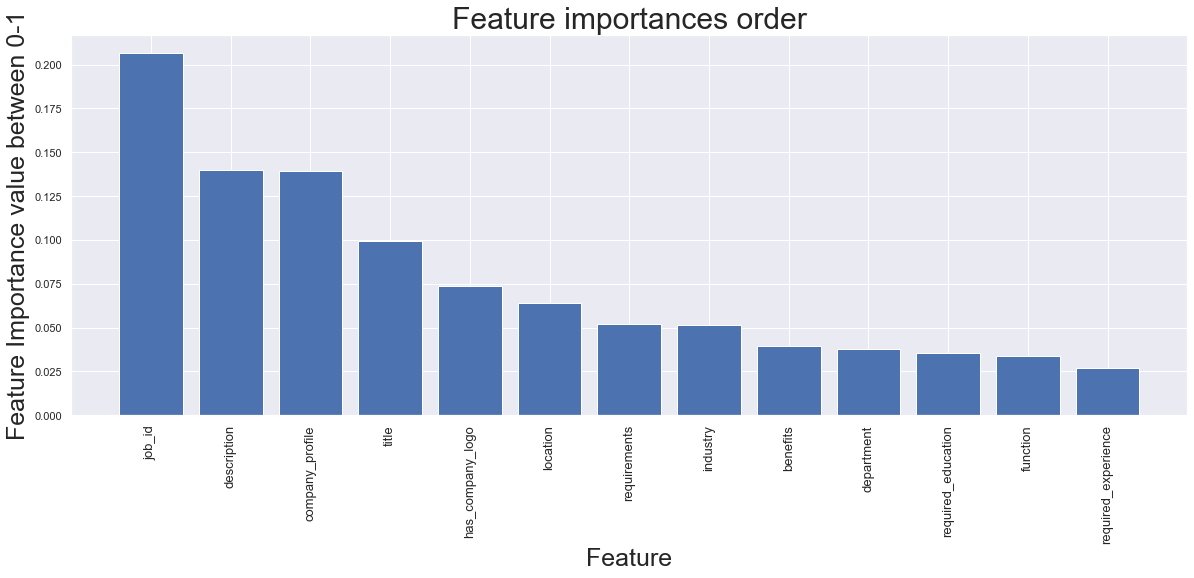

In [33]:
#find the importance ranking 
#use the best parameters from gridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy', max_features=3, bootstrap= False, min_samples_split=3,
                             max_depth=None, min_samples_leaf=10)


forest=clf.fit(X, y)

#label for x-axis
features_name = np.array(X.columns.values)
features_name

importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances 
plt.figure(figsize=(20,7))
plt.title("Feature importances order",size=30)
plt.bar(range(X.shape[1]), importances[indices],
      yerr=std[indices], color='b' , align="center")
plt.xticks(range(X.shape[1]), features_name[indices],rotation=90,fontsize = 13)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Feature',size=25)
plt.ylabel('Feature Importance value between 0-1',size=25)
plt.show()


In [ ]:
print("----------------------------------ENTER THE DETAILS OF JOB POSTING NEWS----------------------------------")
Title=input("Enter the Title: ")
Loc=input("Enter the Location: ")
dept=input("Enter the department: ")
sal_ran=input("Enter the salary_range: ")
comp_pro=input("Enter the company_profile: ")
desc=input("Enter the description: ")
req=input("Enter the requirements: ")
benefit=input("Enter the benefits: ")
telecom=int(input("Enter the telecommuting: "))
complogo=int(input("Enter the has_company_logo: "))
h_ques=int(input("Enter the has_questions: "))
E_type=input("Enter the employment_type: ")
req_exp=input("Enter the required_experience: ")
req_ed=input("Enter the required_education: ")
indus=input("Enter the industry: ")
func=input("Enter the function: ")






----------------------------------ENTER THE DETAILS OF JOB POSTING NEWS----------------------------------
Enter the Title: wgr fghgf fghr 


In [2]:
from openpyxl import *
from tkinter import *
  
# globally declare wb and sheet variable 
  
# opening the existing excel file 
wb = load_workbook('F:/Zulu/My Btech/Semester 4/Minor/UserInput.xlsx') 
  
# create the sheet object 
sheet = wb.active 
  
  
def excel(): 
      
    # resize the width of columns in 
    # excel spreadsheet 
    sheet.column_dimensions['A'].width = 10
    sheet.column_dimensions['B'].width = 20
    sheet.column_dimensions['C'].width = 20
    sheet.column_dimensions['D'].width = 20
    sheet.column_dimensions['E'].width = 20
    sheet.column_dimensions['F'].width = 20
    sheet.column_dimensions['G'].width = 20
    sheet.column_dimensions['H'].width = 20
    sheet.column_dimensions['I'].width = 20
    sheet.column_dimensions['J'].width = 10
    sheet.column_dimensions['K'].width = 10
    sheet.column_dimensions['L'].width = 10
    sheet.column_dimensions['M'].width = 20
    sheet.column_dimensions['N'].width = 20
    sheet.column_dimensions['O'].width = 20
    sheet.column_dimensions['P'].width = 20
    sheet.column_dimensions['Q'].width = 20
  
    # write given data to an excel spreadsheet 
    # at particular location 
    sheet.cell(row=1, column=1).value = "job_id"
    sheet.cell(row=1, column=2).value = "title"
    sheet.cell(row=1, column=3).value = "location"
    sheet.cell(row=1, column=4).value = "department"
    sheet.cell(row=1, column=5).value = "salary_range"
    sheet.cell(row=1, column=6).value = "company_profile"
    sheet.cell(row=1, column=7).value = "description"
    sheet.cell(row=1, column=8).value = "requirements"
    sheet.cell(row=1, column=9).value = "benefits"
    sheet.cell(row=1, column=10).value = "telecommuting"
    sheet.cell(row=1, column=11).value = "has_company_logo"
    sheet.cell(row=1, column=12).value = "has_questions"
    sheet.cell(row=1, column=13).value = "employment_type"
    sheet.cell(row=1, column=14).value = "required_experience"
    sheet.cell(row=1, column=15).value = "required_education"
    sheet.cell(row=1, column=16).value = "industry"
    sheet.cell(row=1, column=17).value = "function"
  
  
# Function to set focus (cursor) 
#def focus1(event): 
#    # set focus on the course_field box 
#    j_id.focus_set()
    
def focus2(event): 
    # set focus on the course_field box 
    Title.focus_set()
    
def focus3(event): 
    # set focus on the course_field box 
    Loc.focus_set() 
  
  
# Function to set focus 
def focus4(event): 
    # set focus on the sem_field box 
    dept.focus_set() 
  
  
# Function to set focus 
def focus5(event): 
    # set focus on the form_no_field box 
    sal_ran.focus_set() 
  
  
# Function to set focus 
def focus6(event): 
    # set focus on the contact_no_field box 
    comp_pro.focus_set() 
  
  
# Function to set focus 
def focus7(event): 
    # set focus on the email_id_field box 
    desc.focus_set() 
  
  
# Function to set focus 
def focus8(event): 
    # set focus on the address_field box 
    req.focus_set() 
  
# Function to set focus 
def focus9(event): 
    # set focus on the course_field box 
    benefit.focus_set() 
  
  
# Function to set focus 
def focus10(event): 
    # set focus on the sem_field box 
    telecom.focus_set() 
  
  
# Function to set focus 
def focus11(event): 
    # set focus on the form_no_field box 
    complogo.focus_set() 
  
  
# Function to set focus 
def focus12(event): 
    # set focus on the contact_no_field box 
    h_ques.focus_set() 
  
  
# Function to set focus 
def focus13(event): 
    # set focus on the email_id_field box 
    E_type.focus_set() 
  
  
# Function to set focus 
def focus14(event): 
    # set focus on the address_field box 
    req_exp.focus_set() 

# Function to set focus 
def focus15(event): 
    # set focus on the contact_no_field box 
    req_ed.focus_set() 
  
  
# Function to set focus 
def focus16(event): 
    # set focus on the email_id_field box 
    indus.focus_set() 
  
  
# Function to set focus 
def focus17(event): 
    # set focus on the address_field box 
    func.focus_set() 
 
    

# Function for clearing the 
# contents of text entry boxes 
def Clear(): 
      
    # clear the content of text entry box 
    j_id.delete(0, END) 
    Title.delete(0, END) 
    Loc.delete(0, END) 
    dept.delete(0, END) 
    sal_ran.delete(0, END) 
    comp_pro.delete(0, END)
    desc.delete(0, END)
    req.delete(0, END)
    benefit.delete(0, END) 
    telecom.delete(0, END) 
    complogo.delete(0, END) 
    h_ques.delete(0, END) 
    E_type.delete(0, END) 
    req_exp.delete(0, END)
    req_ed.delete(0, END)
    indus.delete(0, END) 
    func.delete(0, END)


  
# Function to take data from GUI  
# window and write to an excel file 
def insert(): 
      
    # if user not fill any entry 
    # then print "empty input" 
    if (j_id.get() == "" and
        Title.get() == "" and
        Loc.get() == "" and
        dept.get() == "" and
        sal_ran.get() == "" and
        comp_pro.get() == "" and
        desc.get() == "" and
        req.get() == "" and
        benefit.get() == "" and
        telecom.get() == "" and
        complogo.get() == "" and
        h_ques.get() == "" and
        E_type.get() == "" and
        req_exp.get() == "" and
        req_ed.get() == "" and
        indus.get() == "" and
        func.get() == ""): 
              
        print("empty input") 


    else: 
  
        # assigning the max row and max column 
        # value upto which data is written 
        # in an excel sheet to the variable 
        current_row = sheet.max_row 
        current_column = sheet.max_column 
  
        # get method returns current text 
        # as string which we write into 
        # excel spreadsheet at particular location 
        

        sheet.cell(row=current_row + 1, column=1).value = current_row
        sheet.cell(row=current_row + 1, column=2).value = Title.get() 
        sheet.cell(row=current_row + 1, column=3).value = Loc.get() 
        sheet.cell(row=current_row + 1, column=4).value = dept.get() 
        sheet.cell(row=current_row + 1, column=5).value = sal_ran.get() 
        sheet.cell(row=current_row + 1, column=6).value = comp_pro.get() 
        sheet.cell(row=current_row + 1, column=7).value = desc.get() 
        sheet.cell(row=current_row + 1, column=8).value = req.get() 
        sheet.cell(row=current_row + 1, column=9).value = benefit.get() 
        sheet.cell(row=current_row + 1, column=10).value = telecom.get() 
        sheet.cell(row=current_row + 1, column=11).value = complogo.get() 
        sheet.cell(row=current_row + 1, column=12).value = h_ques.get() 
        sheet.cell(row=current_row + 1, column=13).value = E_type.get() 
        sheet.cell(row=current_row + 1, column=14).value = req_exp.get() 
        sheet.cell(row=current_row + 1, column=15).value = req_ed.get() 
        sheet.cell(row=current_row + 1, column=16).value = indus.get() 
        sheet.cell(row=current_row + 1, column=17).value = func.get() 
        predictD={}
        


        # save the file 
        wb.save('F:/Zulu/My Btech/Semester 4/Minor/UserInput.xlsx') 
  
        # set focus on the name_field box 
        Title.focus_set() 
  
        # call the clear() function 
        Clear() 
  
  
# Driver code 
if __name__ == "__main__": 
      
    # create a GUI window 
    root = Tk() 
  
    # set the background colour of GUI window 
    root.configure(background='light green') 
  
    # set the title of GUI window 
    root.title("Fake News Detection") 
  
    # set the configuration of GUI window 
    root.geometry("500x600") 
  
    excel() 
  
    # create a Form label 
    heading = Label(root, text="Fake News Data", bg="light green") 
    
    # create a Name label 
    job_id = Label(root, text="Job id", bg="light green") 
  
    # create a Name label 
    title = Label(root, text="Title", bg="light green") 
  
    # create a Course label 
    location = Label(root, text="Location", bg="light green") 
  
    # create a Semester label 
    department = Label(root, text="Department", bg="light green") 
  
    # create a Form No. lable 
    salary_range = Label(root, text="Enter the Salary Range", bg="light green") 
  
    # create a Contact No. label 
    company_profile = Label(root, text="Company's Profile", bg="light green") 
  
    # create a Email id label 
    description = Label(root, text="Description", bg="light green") 
  
    # create a address label 
    requirements = Label(root, text="Requirements", bg="light green")
    
    # create a Name label 
    benefits = Label(root, text="Benefits", bg="light green") 
  
    # create a Course label 
    telecommuting = Label(root, text="Telecommunication(0/1)", bg="light green") 
  
    # create a Semester label 
    has_company_logo = Label(root, text="Company Logo(0/1)", bg="light green") 
  
    # create a Form No. lable 
    has_questions = Label(root, text="Has Questions(0/1)", bg="light green") 
  
    # create a Contact No. label 
    employment_type = Label(root, text="Emploment Type", bg="light green") 
  
    # create a Email id label 
    required_experience = Label(root, text="Required Experience", bg="light green") 
  
    # create a address label 
    required_education = Label(root, text="Required Education", bg="light green")
    
    # create a Email id label 
    industry = Label(root, text="Industry", bg="light green")

    # create a address label 
    function = Label(root, text="Function", bg="light green")
  
    # grid method is used for placing 
    # the widgets at respective positions 
    # in table like structure . 
    heading.grid(row=0, column=1)
    job_id.grid(row=1, column=0)
    title.grid(row=2, column=0) 
    location.grid(row=3, column=0) 
    department.grid(row=4, column=0) 
    salary_range.grid(row=5, column=0) 
    company_profile.grid(row=6, column=0) 
    description.grid(row=7, column=0) 
    requirements.grid(row=8, column=0) 
    benefits.grid(row=9, column=0) 
    telecommuting.grid(row=10, column=0) 
    has_company_logo.grid(row=11, column=0) 
    has_questions.grid(row=12, column=0) 
    employment_type.grid(row=13, column=0) 
    required_experience.grid(row=14, column=0) 
    required_education.grid(row=15, column=0)
    industry.grid(row=16, column=0)
    function.grid(row=17, column=0)
    
    
    # create a text entry box 
    # for typing the information 
    j_id = Entry(root) 
    Title = Entry(root) 
    Loc = Entry(root) 
    dept = Entry(root) 
    sal_ran = Entry(root) 
    comp_pro = Entry(root) 
    desc = Entry(root) 
    req = Entry(root) 
    benefit = Entry(root) 
    telecom = Entry(root) 
    complogo = Entry(root) 
    h_ques = Entry(root) 
    E_type = Entry(root)
    req_exp = Entry(root)
    req_ed = Entry(root)
    indus = Entry(root)
    func = Entry(root)



    # bind method of widget is used for 
    # the binding the function with the events 
  
    # whenever the enter key is pressed 
    # then call the focus1 function 
    j_id.bind("<Return>", focus2) 

    
    Title.bind("<Return>", focus3) 
  
    # whenever the enter key is pressed 
    # then call the focus2 function 
    Loc.bind("<Return>", focus4) 
  
    # whenever the enter key is pressed 
    # then call the focus3 function 
    dept.bind("<Return>", focus5) 
  
    # whenever the enter key is pressed 
    # then call the focus4 function 
    sal_ran.bind("<Return>", focus6) 
  
    # whenever the enter key is pressed 
    # then call the focus5 function 
    comp_pro.bind("<Return>", focus7) 
  
    # whenever the enter key is pressed 
    # then call the focus6 function 
    desc.bind("<Return>", focus8) 
    
    # whenever the enter key is pressed 
    # then call the focus1 function 
    req.bind("<Return>", focus9) 
  
    # whenever the enter key is pressed 
    # then call the focus2 function 
    benefit.bind("<Return>", focus10) 
  
    # whenever the enter key is pressed 
    # then call the focus3 function 
    telecom.bind("<Return>", focus11) 
  
    # whenever the enter key is pressed 
    # then call the focus4 function 
    complogo.bind("<Return>", focus12) 
  
    # whenever the enter key is pressed 
    # then call the focus5 function 
    h_ques.bind("<Return>", focus13) 
  
    # whenever the enter key is pressed 
    # then call the focus6 function 
    E_type.bind("<Return>", focus14) 
    
    # whenever the enter key is pressed 
    # then call the focus3 function 
    req_exp.bind("<Return>", focus15) 
  
    # whenever the enter key is pressed 
    # then call the focus4 function 
    req_ed.bind("<Return>", focus16) 
  
    # whenever the enter key is pressed 
    # then call the focus5 function 
    indus.bind("<Return>", focus17) 
  
    # whenever the enter key is pressed 
    # then call the focus6 function 
    #func.bind("<Return>", focus17)
  
    # grid method is used for placing 
    # the widgets at respective positions 
    # in table like structure .
    j_id.grid(row=1, column=1, ipadx="100") 
    Title.grid(row=2, column=1, ipadx="100") 
    Loc.grid(row=3, column=1, ipadx="100") 
    dept.grid(row=4, column=1, ipadx="100") 
    sal_ran.grid(row=5, column=1, ipadx="100") 
    comp_pro.grid(row=6, column=1, ipadx="100") 
    desc.grid(row=7, column=1, ipadx="100") 
    req.grid(row=8, column=1, ipadx="100") 
    benefit.grid(row=9, column=1, ipadx="100") 
    telecom.grid(row=10, column=1, ipadx="100") 
    complogo.grid(row=11, column=1, ipadx="100") 
    h_ques.grid(row=12, column=1, ipadx="100") 
    E_type.grid(row=13, column=1, ipadx="100") 
    req_exp.grid(row=14, column=1, ipadx="100") 
    req_ed.grid(row=15, column=1, ipadx="100")
    indus.grid(row=16, column=1, ipadx="100") 
    func.grid(row=17, column=1, ipadx="100") 
    
    
    # call excel function 
    excel() 
  
    # create a Submit Button and place into the root window 
    submit = Button(root, text="Submit", fg="Black", 
                            bg="Red", command=insert) 
    submit.grid(row=18, column=1) 
     
    # start the GUI 
    root.mainloop() 
    
    

In [36]:
#user_df = pd.read_csv("F:/Zulu/My Btech/Semester 4/Minor/UserInput.xlsx")
#user_df = pd.read_csv('F:/Zulu/My Btech/Semester 4/Minor/UserInput.xlsx', error_bad_lines=False)
user_df = pd.read_excel("F:/Zulu/My Btech/Semester 4/Minor/UserInput.xlsx") 
user_df.to_csv("F:/Zulu/My Btech/Semester 4/Minor/UserInput.csv", sep=",")


user_df.drop(['salary_range', 'telecommuting','employment_type','has_questions',], axis=1,inplace=True)

#read data in-1
df = pd.DataFrame(user_df)
#list(df)
ncol = len(df.axes[1])
nrow=len(df.axes[0])
#convert object col to int64 and rename-2
n = ncol
for i in range(0,n):
       if (df.iloc[:,i].dtype==object):
        A= df.iloc[:,i].unique()
        map_to_int = {name: n for n, name in enumerate(A)}
        df.iloc[:,i] = df.iloc[:,i].replace(map_to_int)
#user_df.head()
predicteduser = clf.predict(df)
print(predicteduser)
FraudNews=[]
for i in range(len(predicteduser)):
    if predicteduser[i]==0:
        FraudNews.append("False")
    else:
        FraudNews.append("True")
FraudNews[len(predicteduser)-1]="True"  
df = pd.DataFrame(FraudNews,columns=['FraudNews'])
user_df = pd.read_excel("F:/Zulu/My Btech/Semester 4/Minor/UserInput.xlsx") 
user_df.to_csv("F:/Zulu/My Btech/Semester 4/Minor/UserInput.csv", sep=",")


user_df.drop(['salary_range', 'telecommuting','employment_type','has_questions',], axis=1,inplace=True)
Output = pd.concat([user_df,df], axis=1)
Output


[0 0 0 0 0 0 0 0 0 0]


,job_id,title,location,department,company_profile,description,requirements,benefits,has_company_logo,required_experience,required_education,industry,function,FraudNews
0,1,sdg,df,gdf,df,h,NaN,hgfh,fgh,gfh,gf,hf,hf,False
1,2,dfh,gfh,gfj,j,gh,k,ghj,jh,j,ghj,ghgh,j,False
2,2,dfgdf,g,NaN,gfh,gf,hgfh,gfh,fgh,gfh,gfh,NaN,gfh,False
3,4,dfg,df,h,gfh,fg,h,gfh,h,gf,hf,h,fghf,False
4,5,dgdfggds,g,df,dfh,gdf,h,gfh,gf,df,h,gfh,gf,False
5,6,khjk,hjkgghj,hg,jk,hj,l,kjl,m,hjl,j,lhjlh,lhjjhl,False
6,7,gj,ghk,NaN,hjkhjk,hjk,hjk,hjk,k,khjk,hjk,hjk,hjkklhj,False
7,8,ytujgyjyu,utyuytu,tutyuy,gyugiku,fjgykghk,ftjuugy,gjghikhj,fjgyuh,gkjghkhj,uhkhul,fjghkghk,gfjghkghk,False
8,9,Payroll Data Coordinator Positions - Earn $100...,"US, KS, Abbyville",NaN,NaN,We are a full-service marketing and staffing f...,RequirementsAll you need is access to the Inte...,This is an entry level position and we offer f...,0,NaN,NaN,NaN,NaN,False
9,10,Technician Instrument & Controls \n,US\n,Power Plant & Energy\n,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",1,Mid-Senior level\n,Certification\n,Electrical/Electronic Manufacturing\n,Other\n,True
